# Channels

In [28]:
(ns opencv4.channels
(:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

nil

In [29]:
(def s-mat (new-mat 3 3 CV_8UC1))
(.put s-mat 0 0 (byte-array [100 255 200 
                             100 255 200 
                             100 255 200]))
(dump s-mat)

(u/>>> (-> s-mat clone (resize! (new-size 30 30) 1 1 INTER_AREA)))

(def t-mat (new-mat 1 1 CV_32F))
(set-to t-mat (new-scalar 0.7))
(dump t-mat)

(-> s-mat
    (transform! t-mat)
    (dump))

(u/>>> (-> s-mat (resize! (new-size 30 30) 1 1 INTER_AREA)))

[100 255 200]
[100 255 200]
[100 255 200]
[0.69999999]
[70 178 140]
[70 178 140]
[70 178 140]


In [30]:
(def s-mat (new-mat 3 3 CV_8UC1))
(.put s-mat 0 0 (byte-array [100 255 200 
                             100 255 200 
                             100 255 200]))
(cvt-color! s-mat COLOR_GRAY2BGR)

(def t-mat (new-mat 3 3 CV_32F))
(.put t-mat 0 0 (float-array [2 0 0 
                              0 1 0 
                              0 0 1]))
(dump t-mat)

(-> s-mat
    (transform! t-mat)
    (dump))

(u/>>> (-> s-mat (resize! (new-size 30 30) 1 1 INTER_AREA)))

[2 0 0]
[0 1 0]
[0 0 1]
[200 100 100 255 255 255 255 200 200]
[200 100 100 255 255 255 255 200 200]
[200 100 100 255 255 255 255 200 200]


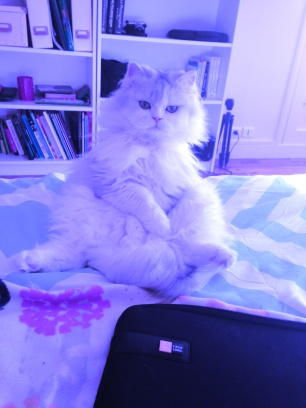

In [31]:
(def my-sister-cat   
  (-> "resources/chapter03/emilie1.jpg" (imread IMREAD_REDUCED_COLOR_8)))

(-> my-sister-cat   
  clone
  (transform! (u/matrix-to-mat [ [2 0 1.1] [0 1 0] [0 0 1]]))
  u/>>>)

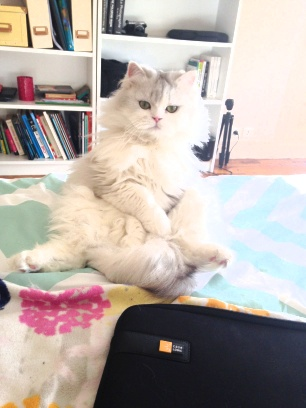

In [32]:
(-> my-sister-cat   
  clone
  (cvt-color! COLOR_BGR2HSV)
  (transform! (u/matrix-to-mat [ [1 0 0] [0 1 0] [0 0 1.5]]))
  (cvt-color! COLOR_HSV2BGR)
  u/>>>)

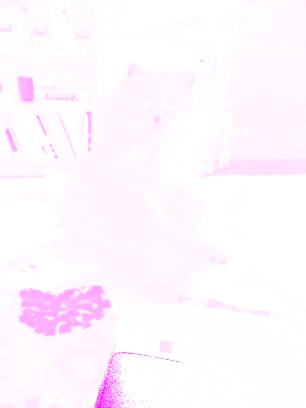

In [33]:
(def 
  usui-cat
  (-> my-sister-cat   
  clone
  (cvt-color! COLOR_BGR2YUV)
  (transform! (u/matrix-to-mat [
			  [20 0 0]
			  [0 1 0]
			  [0 0 1]]))
  (cvt-color! COLOR_YUV2BGR)
  (transform! (u/matrix-to-mat [[4 0 0]
                                [0 1 0]
                                [0 0 2]]))
  (cvt-color! COLOR_BGR2HSV)    
  (transform! (u/matrix-to-mat [[1 0 0]
                          [0 3 0]
                          [0 0 1]]))
  (cvt-color! COLOR_HSV2BGR)    
      ))

(u/>>> usui-cat)

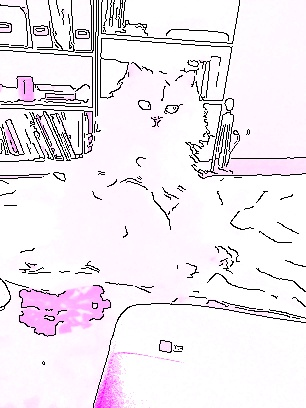

In [34]:
(def 
  line-cat
  (-> my-sister-cat 
      clone
  (cvt-color! COLOR_BGR2GRAY)
  (canny! 100.0 150.0 3 true)
  (cvt-color! COLOR_GRAY2BGR)
  (bitwise-not!)))

(u/>>> line-cat)

(def target (new-mat))
;(add-weighted usui-cat 1 line-cat 1 2 target)
(bitwise-and usui-cat line-cat target)
;(add usui-cat line-cat target)
(u/>>> target)

### a la main

In [35]:
(def orange-mat 
  (new-mat 3 3 CV_8UC3 rgb/orange-2))
(def channels (new-arraylist))
(split orange-mat channels)

(dump (nth channels 0))
(dump (nth channels 1))
(dump (nth channels 2))

[0 0 0]
[0 0 0]
[0 0 0]
[154 154 154]
[154 154 154]
[154 154 154]
[238 238 238]
[238 238 238]
[238 238 238]


nil

In [36]:
(def orange-mat 
  (new-mat 30 30 CV_8UC3 rgb/orange-2))

(def channels (new-arraylist))
(split orange-mat channels)
(set-to (nth channels 1) (new-scalar 0.0))

(merge channels orange-mat)

(u/>>> orange-mat)

### with a function

In [37]:
(defn update-channel! [ mat fnc chan]
  (let [ channels (new-arraylist)]
    (split mat channels)
    (let [
      old-ch (nth channels chan)
      new-ch
    (u/bytes-to-mat!
      (new-mat (.height mat) (.width mat) (.type old-ch) )
       (byte-array (map fnc (u/mat-to-bytes old-ch) )))]
     (.set channels chan new-ch)
     (merge channels mat)
     mat)))

#'opencv4.channels/update-channel!

In [38]:
(def my-sister-cat   
  (-> "resources/chapter03/emilie1.jpg" (imread IMREAD_REDUCED_COLOR_8)))

#'opencv4.channels/my-sister-cat

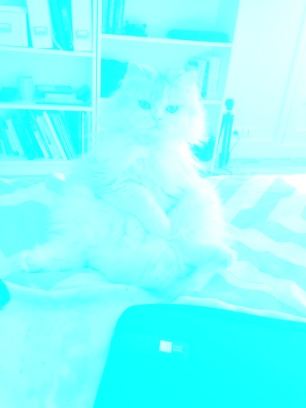

In [39]:
 (->
   my-sister-cat
   clone
   ;(update-channel! (fn [x] (let[y (+ x 10)] (if (> 255 y) 255 y)) ) 0)
   (update-channel! (fn [x] 255) 1)
   (update-channel! (fn [x] 255) 0)
   u/>>>)

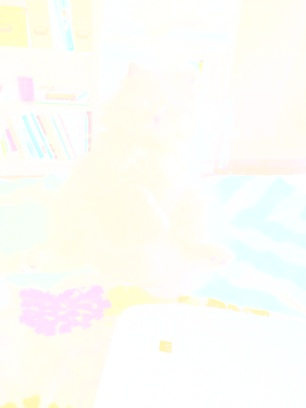

In [40]:
 (->
   my-sister-cat
   clone
  (cvt-color! COLOR_BGR2YUV)
  ;(update-channel! (fn [x] (Math/max 250 (+ 150 x))) 0)
  (update-channel! (fn [x] 255) 0)
  (cvt-color! COLOR_YUV2BGR)
  (u/>>>))

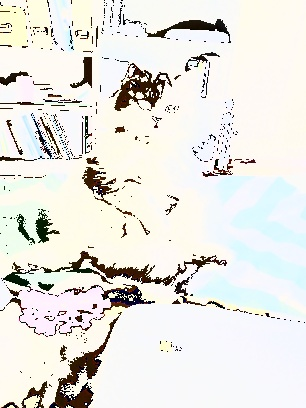

In [41]:
 (->
   my-sister-cat
   clone
  (cvt-color! COLOR_RGB2Luv)
  (update-channel! (fn [x] (Math/max 250 (+ 150 x))) 0)
  (cvt-color! COLOR_Luv2RGB)
  (u/>>>)
  )

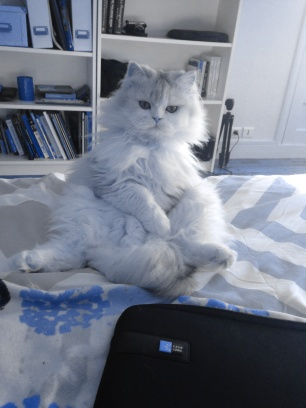

In [42]:
 (->
   my-sister-cat
   clone
  (cvt-color! COLOR_RGB2HSV)
  (update-channel! (fn [x] 10) 0) ; blue filter
  (cvt-color! COLOR_HSV2RGB)
  (u/>>>))

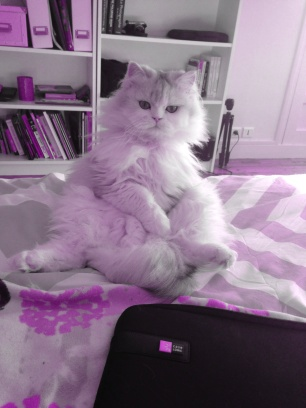

In [43]:
 (->
   my-sister-cat
   clone
  (cvt-color! COLOR_RGB2HLS)
  (update-channel! (fn [x] 150) 0) ; pink filter
  (cvt-color! COLOR_HLS2RGB)
  (u/>>>))

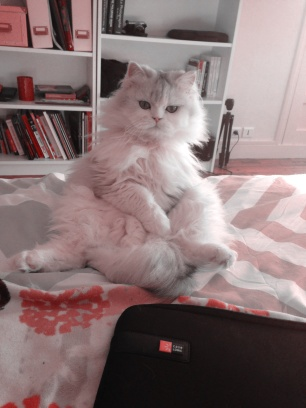

In [44]:
 (->
   my-sister-cat
   clone
  (cvt-color! COLOR_RGB2HLS)
  (update-channel! (fn [x] 120) 0) ; red filter
  (cvt-color! COLOR_HLS2RGB)
  (u/>>>))

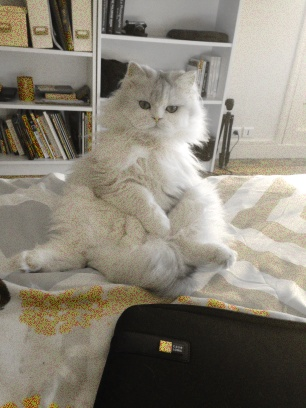

In [45]:
 (->
   my-sister-cat
   clone
  (cvt-color! COLOR_RGB2HLS)
  (update-channel! (fn [x] (+ 80 (rand 40))) 0) ; red filter
  (cvt-color! COLOR_HLS2RGB)
  (u/>>>))